In [1]:
import os
#import pinecone
from pinecone import Pinecone
from dotenv import load_dotenv
from pathlib import Path
from collections import Counter
#from tqdm.notebook import tqdm
from langchain.text_splitter import RecursiveCharacterTextSplitter
#from langchain_pinecone import PineconeVectorStore
import json
from embeddings_utils import process_directory, upload_to_pinecone
from ai_agent import interactive_qa

In [2]:
# Load variables from .env into environment
load_dotenv()

# Access them
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")
OPEN_API_API_KEY = os.getenv("OPENAI_API_KEY")
HF_TOKEN = os.getenv("HF_TOKEN")
SONAR_API_KEY = os.getenv("SONAR_API_KEY")

In [3]:
# Directory to search
directory = Path("Policy Pulse + AVE collab")

# Patterns for PDFs, Word, and PowerPoint documents
file_extensions = ["**/*.pdf"]#, "**/*.docx", "**/*.pptx"]

# Collect all matching files recursively for the specified extensions
#file_paths = [str(p) for ext in file_extensions for p in directory.glob(ext)]
file_paths = [str(p) for p in directory.glob('**/*')]

# Print the list of files
file_paths


['Policy Pulse + AVE collab\\Module 1',
 'Policy Pulse + AVE collab\\Module 2',
 'Policy Pulse + AVE collab\\Module 4',
 'Policy Pulse + AVE collab\\Module 5',
 'Policy Pulse + AVE collab\\Module 1\\Module 1 Lesson 3 Compliance legal and ethical considerations.docx',
 'Policy Pulse + AVE collab\\Module 1\\Reproductive and Fertility Health at Work Course module 1.docx',
 'Policy Pulse + AVE collab\\Module 1\\Script Full curriculum with case studies from Chat GPT.docx',
 'Policy Pulse + AVE collab\\Module 1\\Script v3 module 1 Full curriculum with case studies from Chat GPT.docx',
 'Policy Pulse + AVE collab\\Module 2\\Case Study How Company X Implemented a Reproductive and Fertility Health Guide.docx',
 'Policy Pulse + AVE collab\\Module 2\\Guide Outline',
 'Policy Pulse + AVE collab\\Module 2\\Handout Key Components Checklist.docx',
 'Policy Pulse + AVE collab\\Module 2\\Key Components Handout pdf',
 'Policy Pulse + AVE collab\\Module 2\\Locations',
 'Policy Pulse + AVE collab\\Module 

In [4]:
print(f"the number of actual files is:{len([str(p) for p in directory.glob('**/*') if p.is_file()])}")
print(f"the number of actual folders is:{len([str(p) for p in directory.glob('**/*') if p.is_dir()])}")

the number of actual files is:55
the number of actual folders is:13


In [5]:

# Directory to search
directory = Path("Policy Pulse + AVE collab")

# Get all files (excluding directories)
all_files = [p for p in directory.glob('**/*') if p.is_file()]

# Count by extension
extension_counts = Counter([p.suffix.lower() for p in all_files])

# Print counts by extension
for ext, count in extension_counts.most_common():
    print(f"{ext or '(no extension)'}: {count} files")

# Print total
print(f"\nTotal number of files: {len(all_files)}")

.docx: 17 files
.jpg: 7 files
.webp: 6 files
.pdf: 6 files
.jfif: 5 files
.pptx: 5 files
.png: 4 files
.jpeg: 3 files
.odp: 1 files
.avif: 1 files

Total number of files: 55


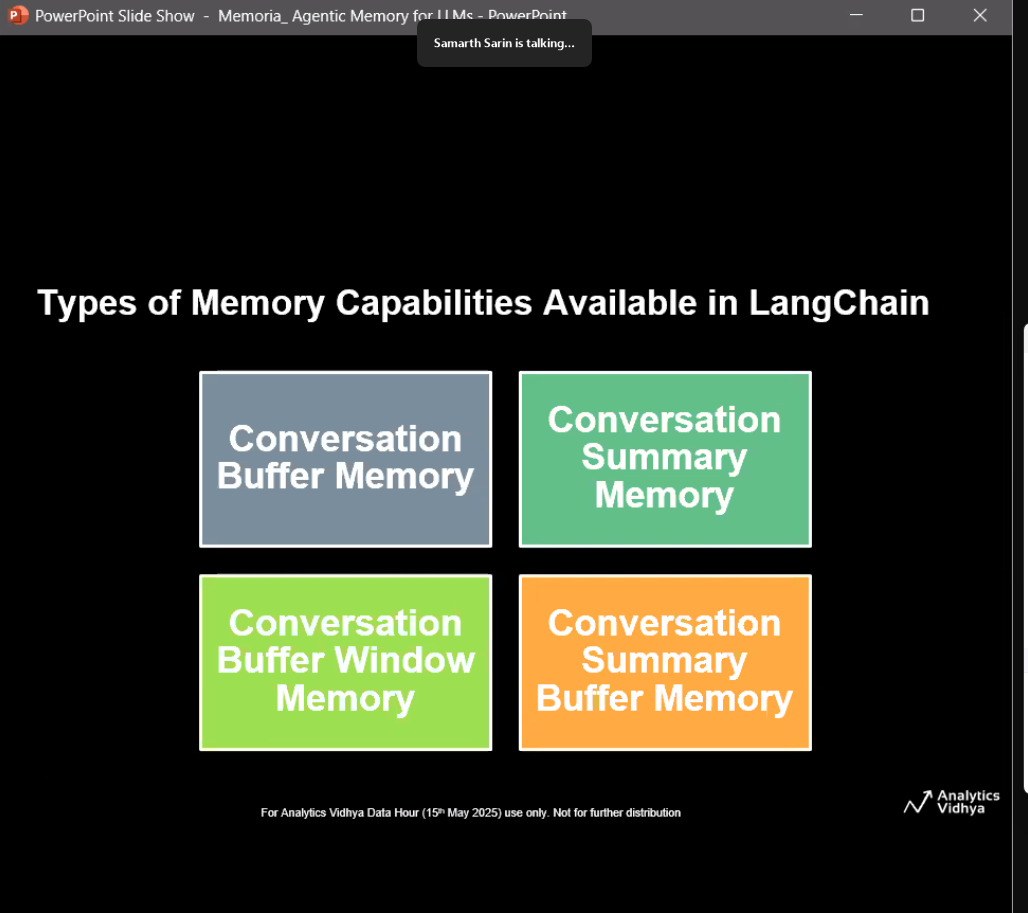

In [6]:
# Initialize the text splitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=2000,
    chunk_overlap=400,
    length_function=len,
)



In [7]:
import importlib
import embeddings_utils
importlib.reload(embeddings_utils)

# Re-import the functions if needed
from embeddings_utils import process_directory, upload_to_pinecone

In [8]:
# Directory containing your documents
from datetime import datetime
directory_path = "Policy Pulse + AVE collab"
index_name = "policypulse2"  # Replace with your Pinecone index name

# Process all documents
print(f"Starting to process documents in directory: {directory_path} at time {datetime.now()}")
documents = process_directory(directory_path, text_splitter)

#  Save documents metadata locally
print("Saving document metadata...")
with open("documents_metadata.json", "w") as f:
    # Save just the metadata and IDs for reference
    metadata_records = [{"id": doc["id"], "metadata": doc["metadata"]} for doc in documents]
    json.dump(metadata_records, f, indent=2)


# Upload to Pinecone
pinecone_api_key = PINECONE_API_KEY  # Replace with your Pinecone API key
index_name = "policypulse2"  # Your index name

# Uncomment to upload
upload_to_pinecone(documents, index_name, pinecone_api_key)

print(f"Process completed at {datetime.now()}!")

Starting to process documents in directory: Policy Pulse + AVE collab at time 2025-09-30 23:20:38.335179
Found 29 supported documents to process


Processing files:   0%|          | 0/29 [00:00<?, ?it/s]

Processing: Policy Pulse + AVE collab\Module 1\Module 1 Lesson 3 Compliance legal and ethical considerations.docx
Created 6 chunks for Policy Pulse + AVE collab\Module 1\Module 1 Lesson 3 Compliance legal and ethical considerations.docx
Processing: Policy Pulse + AVE collab\Module 1\Reproductive and Fertility Health at Work Course module 1.docx
Created 7 chunks for Policy Pulse + AVE collab\Module 1\Reproductive and Fertility Health at Work Course module 1.docx
Processing: Policy Pulse + AVE collab\Module 1\Script Full curriculum with case studies from Chat GPT.docx
Created 12 chunks for Policy Pulse + AVE collab\Module 1\Script Full curriculum with case studies from Chat GPT.docx
Processing: Policy Pulse + AVE collab\Module 1\Script v3 module 1 Full curriculum with case studies from Chat GPT.docx
Created 13 chunks for Policy Pulse + AVE collab\Module 1\Script v3 module 1 Full curriculum with case studies from Chat GPT.docx
Processing: Policy Pulse + AVE collab\Module 2\Case Study How 

Uploading to Pinecone:   0%|          | 0/2 [00:00<?, ?it/s]

Sample record format: {'id': 'Module 1 Lesson 3 Compliance legal and ethical considerations_chunk_0', 'text': "Module 1\nThe case for Reproductive Health at Work\nLesson 3: Compliance, Legal, and Ethical Considerations (45 minutes)\nLegal Landscape Overview (15 minutes)\nDiscuss key regulations in the UK and Europe:\nUK:\nThe Equality Act 2010 (protection against pregnancy and maternity discrimination, sex discrimination).\nPregnancy and Maternity Discrimination:\nMitie Ltd: In a landmark case, Ms. N Hinds was awarded £350,000 after experiencing pregnancy discrimination. Her employer excluded her from meetings, unjustly criticized her performance, and failed to support her requests for reasonable adjustments during her pregnancy. The tribunal found that Mitie Ltd's actions led to constructive dismissal and discrimination. \nwirehouse-es.com\nEvent Medical Group: Lesley Coia won over £6,000 in compensation after her male boss persistently inquired about her pregnancy status, constitutin

In [9]:
# When saving metadata and text chunks for viewing:
with open("documents_metadata_and_chunks.json", "w", encoding="utf-8") as f:
    # Convert each document to a dict with formatted metadata and full text
    viewable_docs = []
    for doc in documents:
        # Create a copy with formatted text for better viewing
        doc_copy = {
            "id": doc["id"],
            "metadata": doc["metadata"],
            # Format the text to be more readable in the JSON file
            "text_sample": doc["text"][:500] + "..." if len(doc["text"]) > 500 else doc["text"]
        }
        viewable_docs.append(doc_copy)
    
    # Use indent for formatting and ensure_ascii=False for proper character handling
    json.dump(viewable_docs, f, indent=2, ensure_ascii=False)

In [10]:
# For a more readable output of chunks:
with open("document_chunks.txt", "w", encoding="utf-8") as f:
    for i, doc in enumerate(documents):
        f.write(f"\n{'='*80}\n")
        f.write(f"CHUNK {i+1}: {doc['id']}\n")
        f.write(f"{'='*80}\n\n")
        f.write(doc["text"])
        f.write("\n\n")

In [ ]:
# This cell is to verify the upload by fetching some vectors and printing their metadata
import json
import time
# Path to your JSON file
file_path = "documents_metadata_and_chunks.json" # need to get chunk ids from here first in local repo

# Load JSON into Python
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)   # data is now a list of dicts

# Extract all IDs into a list
ids = [record["id"] for record in data]

print(f"Found {len(ids)} IDs")
print("First 5 IDs:", ids[:5])  # peek at first few

pc = Pinecone(api_key=PINECONE_API_KEY)
index = pc.Index("policypulse2")

time.sleep(10)  # brief pause to ensure index is ready
resp = index.fetch(ids=ids[0:2])

# resp is a FetchResponse; access its vectors
for vid, record in resp.vectors.items():
    print(f"\n=== ID: {vid} ===")
    print("Metadata:", record.metadata)
    print("Vector length:", len(record.values))

stats = index.describe_index_stats()
print("\n",stats)


Found 107 IDs
First 5 IDs: ['Module 1 Lesson 3 Compliance legal and ethical considerations_chunk_0', 'Module 1 Lesson 3 Compliance legal and ethical considerations_chunk_1', 'Module 1 Lesson 3 Compliance legal and ethical considerations_chunk_2', 'Module 1 Lesson 3 Compliance legal and ethical considerations_chunk_3', 'Module 1 Lesson 3 Compliance legal and ethical considerations_chunk_4']

=== ID: Module 1 Lesson 3 Compliance legal and ethical considerations_chunk_1 ===
Metadata: {'file_type': '.docx', 'metadata': '{"filename": "Module 1 Lesson 3 Compliance legal and ethical considerations.docx", "file_type": ".docx", "chunk_id": "1", "preview": "The Employment Rights Act 1996 (statutory rights for maternity leave, paternity leave, shared parent..."}', 'serial_number': 1.0, 'text': "The Employment Rights Act 1996 (statutory rights for maternity leave, paternity leave, shared parental leave)\n\nThe Health and Safety at Work Act 1974 (employer responsibilities regarding workplace adjust

In [ ]:
pc = Pinecone(api_key=PINECONE_API_KEY)

In [ ]:
# Use this to delete the index if needed - THINK CAREFULLY BEFORE RUNNING

from pinecone import Pinecone

# initialize client
#pc = Pinecone(api_key=PINECONE_API_KEY)

# delete index
index_name = "policypulse2"
if index_name in [i["name"] for i in pc.list_indexes()]:
    pc.delete_index(index_name)
    print(f"Index '{index_name}' deleted.")
else:
    print(f"Index '{index_name}' does not exist.")


In [ ]:
print(pc.list_indexes())

In [ ]:
# This is to create an index with a given name if it doesn't exist
from pinecone import ServerlessSpec

# initialize client
pc = Pinecone(api_key=PINECONE_API_KEY)


index_name = "policypulse2"

if not pc.has_index(index_name):
    pc.create_index_for_model(
        name=index_name,
        cloud="aws",
        region="us-east-1",
        embed={
            "model":"llama-text-embed-v2",
            "field_map":{"text": "text"}
        }
    )

print("Index 'policypulse2' created.")
